In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [49]:
df = pd.read_csv("./full_data.csv")

In [50]:
df = df.drop(columns=["filename"])

# Down Sampling:

In [4]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]
value_counts = df['kelas'].value_counts()
total_count = df.shape[0]
class_counts = []
for i in value_counts:
    class_counts.append(i)
excludeColumn = value_counts.idxmin()
columnSaved = value_counts[value_counts.index!=excludeColumn].index
minorityClass = df[df.kelas == excludeColumn].index
selected_examples = []
for col in columnSaved:
  major = df[df.kelas == col].index
  num_examples = min(class_counts)
  
  # Loop through each class
  class_examples = np.random.choice(major, size=num_examples, replace=False)
    
    # Add the selected examples to the list
  selected_examples.extend(class_examples)
  print("Total of",col,":",len(class_examples))
undersampleIndices = np.concatenate([minorityClass,selected_examples])
df = df.loc[undersampleIndices]

Total of FNSZ : 230
Total of GNSZ : 230


In [5]:
df.kelas.value_counts()

CPSZ    230
FNSZ    230
GNSZ    230
Name: kelas, dtype: int64

# Tanpa downsampling:

In [51]:
df=df[df.kelas != "ABSZ"]
df=df[df.kelas != "TCSZ"]
df=df[df.kelas != "TNSZ"]
df=df[df.kelas != "SPSZ"]
df=df[df.kelas != "MYSZ"]

# Label Encoding: 

In [52]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['kelas']= label_encoder.fit_transform(df['kelas'])
le_name_mapping = dict(zip(label_encoder.classes_, 
                            label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

df['kelas'].unique()

{'CPSZ': 0, 'FNSZ': 1, 'GNSZ': 2}


array([1, 2, 0])

In [35]:
y = df['kelas']
x = df.drop(columns='kelas') #siapkan x dan y

# Over sampling:

In [36]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

# data splitting:

In [37]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state = 0)

# KNN:

## Euclidean:

Accuracy: 0.7386634844868735


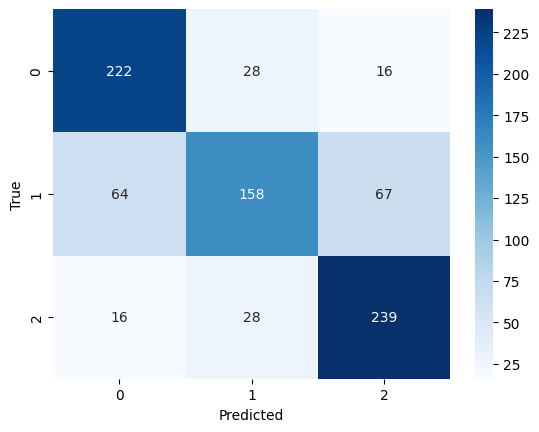

In [43]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='euclidean').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Cosine:

Accuracy: 0.5692124105011933


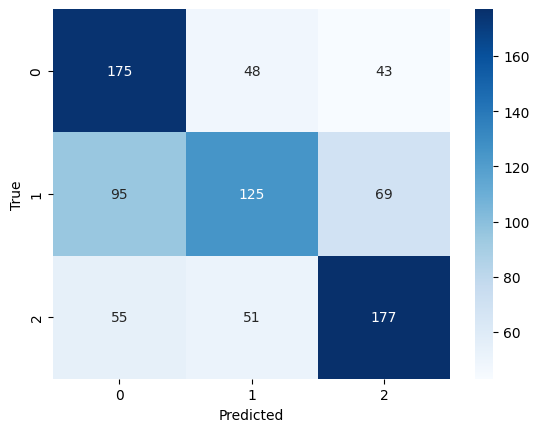

In [44]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='cosine').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Cityblock:

Accuracy: 0.747016706443914


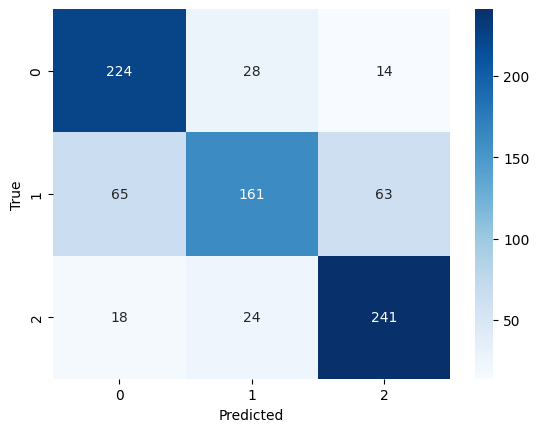

In [45]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='cityblock').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Minkowski:

Accuracy: 0.7386634844868735


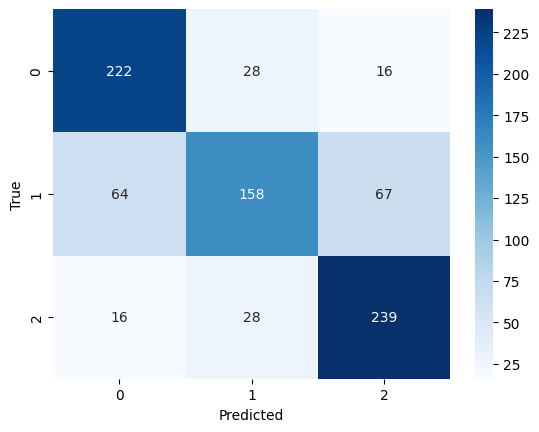

In [46]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, 
                        metric='minkowski').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Correlation:

Accuracy: 0.34725536992840095


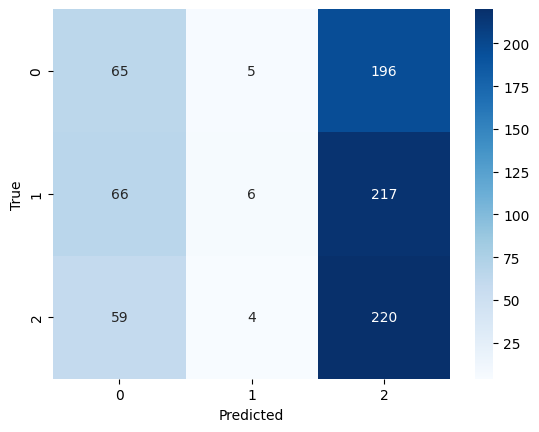

In [47]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import scipy
knn = KNeighborsClassifier(n_neighbors = 3, 
                       metric='correlation').fit(X_train, y_train)
  
# accuracy on X_test
print("Accuracy:", knn.score(X_test, y_test))
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()